In [1]:
import os
os.getcwd()

'C:\\Users\\user'

In [2]:
import pandas as pd

In [3]:
# Raw Data Loading
mnist = pd.read_csv('./mnist_train.csv')

In [4]:
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [6]:
y_data= mnist['label']

In [7]:
y_data.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [8]:
X_data = mnist.drop('label', axis = 1, inplace=False)

In [9]:
X_data.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler.fit(X_data)
X_norm_data = scaler.transform(X_data)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_norm_data, y_data, test_size=0.2)

In [19]:
X_train.shape

(48000, 784)

In [14]:
# model 설정

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [20]:
model = Sequential()

In [21]:
model.add(Flatten(input_shape=(784,))) # input Layer
model.add(Dense(units=10, activation= 'softmax'))

In [22]:
model.compile(optimizer = SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
# 5. 모델 훈련
# verbose: Integer. 0, 1, or 2. 
# Verbosity mode. 
# 0 = silent, 
# 1 = progress bar, 
# 2 = one line per epoch.

In [37]:
history = model.fit(X_train,y_train,
              validation_data=(X_test,y_test),
              steps_per_epoch= 50,
              validation_steps=50,
              epochs=50, verbose=1)

Epoch 1/50
50/50 [==============================] - 0s 4ms/step - loss: 1.5759 - accuracy: 0.6522 - val_loss: 1.5658 - val_accuracy: 0.6547
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 1.5515 - accuracy: 0.6618 - val_loss: 1.5420 - val_accuracy: 0.6635
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 1.5281 - accuracy: 0.6708 - val_loss: 1.5190 - val_accuracy: 0.6716
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 1.5054 - accuracy: 0.6799 - val_loss: 1.4968 - val_accuracy: 0.6807
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 1.4835 - accuracy: 0.6874 - val_loss: 1.4753 - val_accuracy: 0.6864
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 1.4624 - accuracy: 0.6947 - val_loss: 1.4546 - val_accuracy: 0.6952
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 1.4419 - accuracy: 0.7014 - val_loss: 1.4346 - val_accuracy: 0.7007
Epoch 8/50
50/50 [==

In [24]:
model.evaluate(X_test , y_test)

375/375 [==============================] - 0s 671us/step - loss: 1.8943 - accuracy: 0.4608


[1.8943004608154297, 0.460833340883255]

In [34]:
# 6. 모델 저장
model.save('model3.h5')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [29]:
import matplotlib.pyplot as plt

In [30]:
acc = history.history['accuracy']
loss= history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

In [35]:
# acc

In [31]:
epochs = range(len(acc))

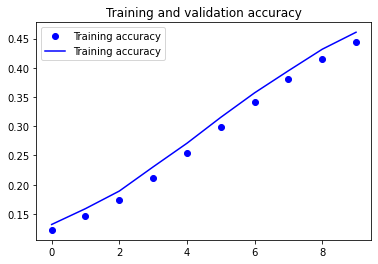

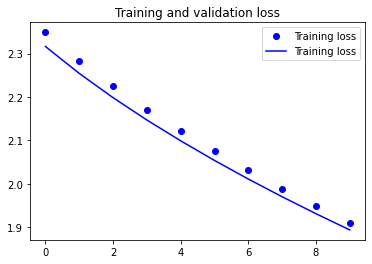

In [32]:
plt.plot(epochs, acc, 'bo', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Training accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()